## Final Project Submission

Please fill out:
* Student name: Yasir F. Karim, Amir M. Edris
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Fang Fang Lee.
* Blog post URL:


In [1]:
import pandas as pd  # Import the neccesarry libraries to work with and manipulate the data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # to avoid viewing scientific notation

##  Investigate the Box Office Mojo Movie Gross csv file
___

In [3]:
# Read the Box Office Mojo Gross income csv file in pandas dataframe 
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

In [4]:
bom_gross.head()  # look at the first five entries

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
bom_gross.dtypes  # check the column types

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
bom_gross.shape  # check the dimensions of the DataFrame

(3387, 5)

In [7]:
bom_gross.isnull().sum()  # check how many values are null in each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
foreign_films = bom_gross[bom_gross.domestic_gross.isnull()]
foreign_films.head()  # check the null values in the domestic gross column in a seprate dataframe

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,nan,1300000,2010
298,Celine: Through the Eyes of the World,Sony,nan,119000,2010
302,White Lion,Scre.,nan,99600,2010
306,Badmaash Company,Yash,nan,64400,2010
327,Aashayein (Wishes),Relbig.,nan,3800,2010


Through some inspection of the titles in this dataframe, we can tell that most of these films are foreign, which is why their domestic (North American) gross is not available. We can infer that in most of these cases the films were not released in the North American Market.

In [9]:
no_foreign = bom_gross[bom_gross.foreign_gross.isnull()]  # Let's check the entries with no foreign gross
no_foreign.head(15)

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
287,Sweetgrass,CGld,207000.0,NaN,2010
291,Casino Jack and the United States of Money,Magn.,177000.0,NaN,2010
308,Alamar,FM,61600.0,NaN,2010
311,Hatchet 2,Vita.,52600.0,NaN,2010
319,Living in Emergency,Truly,32200.0,NaN,2010


After inspecting these titles, we can see that a lot of these are obscure and most likely low budget indpedent films. These titles in most cases did not have a worldwide release. In other cases, it is likely that getting foreign gross is stil not so convenient due lack a common information hub. 

In [10]:
bom_gross['foreign_gross'] = bom_gross.foreign_gross.str.strip()

# Foreign gross is an object type so lets strip it of any whitespaces.

In [11]:
bom_gross_copy = bom_gross.copy() # Let's make a copy of the dataframe in case we make significant changes.

In [12]:
bom_gross_copy['foreign_gross'].fillna(value = 0, inplace = True)
bom_gross_copy['domestic_gross'].fillna(value = 0, inplace = True)

# because in most cases these columns have empty values due to lack of release we can exchange them 0

In [13]:
bom_gross_copy.foreign_gross = bom_gross_copy.foreign_gross.str.replace(',','')

# there are more string values that need to omitted in order to change column to float type

In [14]:
bom_gross_copy.foreign_gross = bom_gross_copy.foreign_gross.astype(float)  # convert column to float type

### Make a new Worldwide gross column
- Let's add the domestic and foreign gross to get this new column

In [15]:
bom_gross_copy['worldwide_gross'] = bom_gross_copy['domestic_gross'] + bom_gross_copy['foreign_gross']
# make a new column of the worldwide income by adding the domestic and foreign gross

In [16]:
bom_gross_copy.head()  # inspect the first few elements to confirm changes

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000.0
3,Inception,WB,292600000.0,535700000.0,2010,828300000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,752600000.0


In [17]:
yearly_gross = bom_gross_copy.groupby('year')['worldwide_gross'].mean()
yearly_gross # look at the avg worldwide gross by year

year
2010    78111773.6
2011    87326780.5
2012   110943005.2
2013   132542658.0
2014   113949375.2
2015   135857724.1
2016   153788382.0
2017   171728654.0
2018   163230345.5
Name: worldwide_gross, dtype: float64

Text(0.5, 1.0, 'Avg Worldwide Gross By Year')

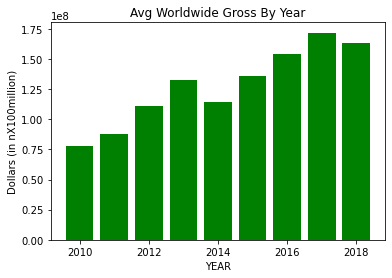

In [18]:
plt.bar(x = yearly_gross.index, height= yearly_gross, color = 'green')
plt.xlabel('YEAR')
plt.ylabel('Dollars (in nX100million)')
plt.title('avg worldwide gross by year'.title())

- **Make this graph nicer**
- We can also compare it to Total Worldwide Gross per year, which is more stagnant.

In [19]:
bom_gross_copy.dtypes # check the column types

title               object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
worldwide_gross    float64
dtype: object

## Explore IMDb Title Basics dataset
___

In [20]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Explore The Numbers movie budgets dataset
---

In [21]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')  # read this csv file into a DataFrame
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
budgets.isnull().sum()  # check to see how many null values are in each column

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [23]:
budgets.shape  # check the dimension of the DataFrame

(5782, 6)

In [24]:
budgets['year'] = budgets.release_date.str[-4:].astype(int)
# create a new column by extracting the year from release_date column as an INT type

In [25]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [26]:
budgets.year.value_counts()  # check to see how many years of info does this dataset have

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1947      1
1927      1
1941      1
1937      1
1915      1
Name: year, Length: 96, dtype: int64

In [27]:
# make a new dataframe with only the last 10 years of movie information
budgets_2010s = budgets[budgets['year'] >= 2010]
budgets_2010s.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015


In [28]:
print(budgets_2010s.shape)  # check how many movies are registered from the decade

(2194, 7)


In [29]:
monetary_cols = ['production_budget','domestic_gross','worldwide_gross']  

In [30]:
for col in monetary_cols:  # transform the columns relating to capital in order to make them INT type
    budgets_2010s[col] = budgets_2010s[col].str.replace('$','').str.replace(',','').astype(int)
budgets_2010s.head()

<ipython-input-30-787b31f080d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_2010s[col] = budgets_2010s[col].str.replace('$','').str.replace(',','').astype(int)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015


In [31]:
budgets_2010s.worldwide_gross.value_counts()  # there are many 0 values in both domestic and worldwide gross

0            272
34044909       1
305270083      1
1844228        1
5797192        1
            ... 
67130045       1
6656705        1
46414530       1
78672579       1
17920013       1
Name: worldwide_gross, Length: 1923, dtype: int64

In [32]:
budgets_2010s[budgets_2010s.worldwide_gross == 0].head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,2020
479,80,"Dec 13, 2017",Bright,90000000,0,0,2017
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,2019
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,2020
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,2019
671,72,"Dec 31, 2019",355,75000000,0,0,2019
951,52,"Dec 11, 2015",The Ridiculous 6,60000000,0,0,2015
952,53,"Nov 8, 2019",Midway,59500000,0,0,2019
1205,6,"Dec 31, 2020",Hannibal the Conqueror,50000000,0,0,2020
1206,7,"Nov 8, 2019",Arctic Dogs,50000000,0,0,2019


After inspecting the missing values, we can infer that there are mixed reasons for these 0 values. 
- Some of these films are streaming service releases, movies that make box office revenue. 
- Many are foreign films with no North American release. 
- Other values are simply missing even with North American Theatrical Release

In [33]:
# Disregard the movies with missing worldwide_gross and domestic_gross values

budgets_2010s = budgets_2010s[(budgets_2010s.worldwide_gross > 0) & (budgets_2010s.domestic_gross > 0)]
budgets_2010s.shape  # Check how many movies are left from the 2010s

(1787, 7)

In [34]:
1787/2194

0.8144940747493163

`18.6%` of the data was thrown out

In [35]:
# check for any outliers
budgets_2010s.worldwide_gross.sort_values(ascending=False).head(10)

5      2053311220
6      2048134200
33     1648854864
66     1518722794
26     1517935897
3      1403013963
41     1348258224
260    1341693157
4      1316721747
112    1305772799
Name: worldwide_gross, dtype: int64

There seems to be no irregular values on the higher income end of the table.
- Furthermore, we can confidently say a company with the size of microsoft will not produce movies for under at least `1,000,000`.
- Howerver, for the sake of being safe, we can disregard any movies that have been produced under `250,000`.

In [36]:
# take a look at the values for movies prduced under 250,000 just to get an idea of what we're removing
budgets_2010s[budgets_2010s.production_budget < 250000][['production_budget','worldwide_gross']]

,production_budget,worldwide_gross
5609,225000,1109276
5617,200000,2430735
5620,200000,1165996
5622,200000,236806
5632,200000,3648
5642,190000,1577585
5644,180000,17503
5647,175000,2102779
5648,175000,2602
5650,170000,169242


In [37]:
budgets_2010s = budgets_2010s[budgets_2010s.production_budget > 250000]
budgets_2010s.shape  # take a look at the remaining number of movies

(1752, 7)

In [38]:
budgets = budgets_2010s  # reassign the DF to the original DF to avoid 'SettingWithCopyWarning'

In [39]:
budgets['gross_profit'] = budgets['worldwide_gross'] - budgets['production_budget']
# make a new column for the gross profit made from the movie

In [40]:
budgets.release_date.str[:3].unique()  # the first 3 characters indicate the month of release
# check to see if there are only 12 unique values for month in the release_date column

array(['May', 'Jun', 'Dec', 'Apr', 'Nov', 'Jul', 'Mar', 'Feb', 'Oct',
       'Aug', 'Sep', 'Jan'], dtype=object)

In [41]:
budgets['month'] = budgets.release_date.str[:3]
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,gross_profit,month
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,-200237650,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,Dec
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220,Dec


___
**Let's look at the `mean profit` and `mean gross` by month to see if there is an advantage in any period**

In [42]:
profit = budgets.groupby('month')[['worldwide_gross','gross_profit']].mean().sort_values(by='gross_profit')
profit

,worldwide_gross,gross_profit
month,,
Sep,69153767.9,43173409.8
Jan,81762581.7,50952055.4
Oct,78295081.0,52220812.0
Aug,87862933.2,55472469.6
Apr,99672310.8,70721068.6
Feb,121945642.1,81816394.0
Mar,137630460.4,88977234.6
Dec,188946319.5,133241319.5
Nov,197410611.6,140860284.8


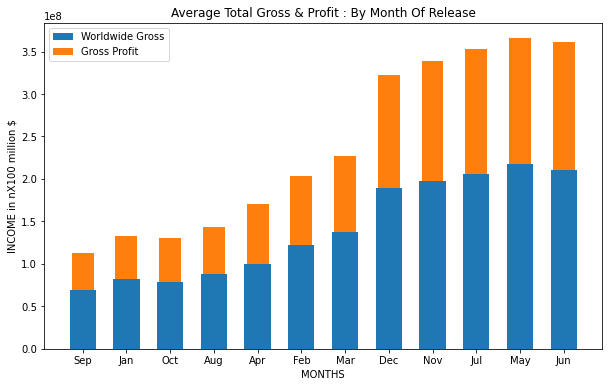

In [52]:
fig, ax = plt.subplots(figsize = (10,6))
ax.bar(x = profit.index, height = profit['worldwide_gross'], label = 'Worldwide Gross', width = .6)
ax.bar(x = profit.index, height = profit['gross_profit'], 
       label = 'Gross Profit', bottom = profit['worldwide_gross'], width = .5)

ax.set_title('Average Total Gross & Profit : By Month Of Release')
ax.legend()

ax.set_ylabel('INCOME in nX100 million $')
ax.set_xlabel('MONTHS')
plt.show()

#### From this chart we can observe that :
- There is a clear disparity between months of the year in terms revenue garnered.
- The vacation/festive months reign above others. `Summer months`; May, June, July, `Holiday Season`; November, december.

In [44]:
budgets.drop('id', axis = 1,inplace = True) # lets drop the id column for now

In [45]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # to view three decimal places

Let's make a new column depending on the budget:
- Low < `30,000,000`
- 30,000,000 < Mid < `125,000,000`
- High > `125,000,000`

In [46]:
budgets['budget_level'] = budgets['production_budget'].apply(lambda x: 'low' if x < 30000000
                                                            else ('Mid' if x < 125000000
                                                                 else 'High'))
budgets['budget_level'].value_counts(normalize = True)

low    0.563
Mid    0.329
High   0.107
Name: budget_level, dtype: float64

In [47]:
# lets create a new table roi for Return On Investment
budgets['roi'] = (budgets['gross_profit'] / budgets['production_budget']) * 100

In [48]:
groupby_budget_lvl = budgets.groupby('budget_level').mean()[['roi','gross_profit']]
groupby_budget_lvl  # lets look at the mean stats for each category of budget

,roi,gross_profit
budget_level,,
High,240.882,424144978.888
Mid,185.122,107798002.943
low,310.623,26077946.064


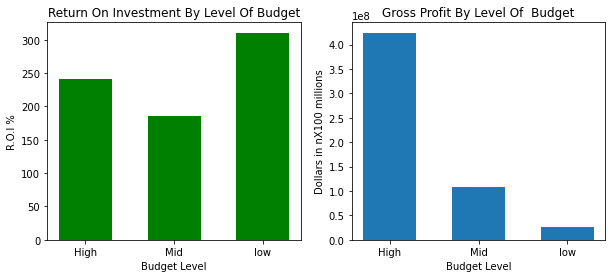

In [49]:
fig = plt.figure(figsize = (10,4))  # Lets plot the above mini-dataframe
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(x = groupby_budget_lvl.index, height = groupby_budget_lvl['roi'], color = 'green', width = 0.6)
ax2.bar(x = groupby_budget_lvl.index, height = groupby_budget_lvl['gross_profit'], width = 0.6)

ax1.set_title('return on investment by level of budget'.title())
ax2.set_title('gross profit by level of  budget'.title())

ax1.set_ylabel('R.O.I %')
ax2.set_ylabel('Dollars in nX100 millions')

ax1.set_xlabel('Budget Level')
ax2.set_xlabel('Budget Level')
plt.show()

#### From the above analysis we can conclude that:
- Gross profit is positively correlated with the level of production budget.
- However, there is greater Return on Investment in small budget films than big budget films
___